## Cars Prices Prediction

##### Predict car prices based on specifications such as horsepower, fuel types, and engine

## Imports & Setup


In [632]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [633]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [634]:
from pycaret.regression import *

## Data Loading

In [635]:
# import kagglehub
# from kagglehub import KaggleDatasetAdapter

# file_path = "Cars Datasets 2025.csv"

# cars_df = kagglehub.load_dataset(
#   KaggleDatasetAdapter.PANDAS,
#   "abdulmalik1518/cars-datasets-2025",
#   file_path,
#   pandas_kwargs={"encoding": "cp1252"}
# )

# cars_df.head()

In [636]:
cars_df=pd.read_csv("cars Datasets 2025.csv", encoding="cp1252")

In [637]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


In [638]:
cars_df.describe().T

,count,unique,top,freq
Company Names,1218,37,Nissan,149
Cars Names,1218,1201,Macan T,2
Engines,1218,356,I4,64
CC/Battery Capacity,1215,311,"2,000 cc",31
HorsePower,1218,456,355 hp,23
Total Speed,1218,114,250 km/h,145
Performance(0 - 100 )KM/H,1212,180,6.5 sec,45
Cars Prices,1218,535,"$35,000",36
Fuel Types,1218,23,Petrol,871
Seats,1218,19,5,692


In [639]:
cars_df.shape

(1218, 11)

In [640]:
cars_df.isnull().sum()

Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          3
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    6
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       1
dtype: int64

## Data Preprocessing

removing duplicated rows

In [641]:
cars_df = cars_df.drop_duplicates()
cars_df.shape 

(1214, 11)

renaming columns

In [642]:
column_rename = {
    "CC/Battery Capacity":"Battery Capacity",
    "Performance(0 - 100 )KM/H":'Performance'
    }
cars_df.rename(columns=column_rename, inplace=True)
cars_df.head()

,Company Names,Cars Names,Engines,Battery Capacity,HorsePower,Total Speed,Performance,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [643]:
cars_df.columns = cars_df.columns.str.strip().str.lower().str.replace(" ", "_")
cars_df.columns

Index(['company_names', 'cars_names', 'engines', 'battery_capacity',
       'horsepower', 'total_speed', 'performance', 'cars_prices', 'fuel_types',
       'seats', 'torque'],
      dtype='object')

In [644]:
cars_cat=['company_names', 'cars_names', 'engines','fuel_types']
cars_num=['battery_capacity','horsepower','total_speed', 'performance', 'seats', 'torque']
target='cars_prices'

In [645]:
cars_df

,company_names,cars_names,engines,battery_capacity,horsepower,total_speed,performance,cars_prices,fuel_types,seats,torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm
...,...,...,...,...,...,...,...,...,...,...,...
1213,Toyota,Crown Signia,2.5L Hybrid I4,2487 cc,240 hp,180 km/h,7.6 sec,"$43,590 ï¿½ $48,000",Hybrid (Gas + Electric),5,239 Nm
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393 cc + Battery,326 hp,180 km/h,6.8 sec,"$50,000",Hybrid,7,630 Nm
1215,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,1987 cc / Hybrid batt,169 ï¿½ 196 hp,190 km/h,8.0 ï¿½ 9.2 sec,"$25,210 ï¿½ $29,135",Gas / Hybrid,5,190 ï¿½ 210 Nm
1216,Toyota,C-HR+,1.8L / 2.0L Hybrid,1798 / 1987 cc + batt,140 ï¿½ 198 hp,180 km/h,7.9 ï¿½ 10.5 sec,"ï¿½ 33,000",Hybrid,5,190 ï¿½ 205 Nm


Cleaning Numeric column 'total_speed':

In [646]:
cars_df['total_speed']=cars_df['total_speed'].astype(str).replace(r'[^0-9]', '', regex=True)
cars_df['total_speed']=cars_df['total_speed'].apply(pd.to_numeric, errors='coerce')

Cleaning Numeric column 'performance':

In [647]:
cars_df['performance']=cars_df['performance'].astype(str).replace(r'[^0-9.]', '', regex=True)
cars_df['performance']=cars_df['performance'].apply(pd.to_numeric, errors='coerce')

Cleaning Numeric columns 'battery_capacity','horsepower', 'torque':
replacing ranges with the averege of the values

In [ ]:
def clean_battery_capacity(x):
    if pd.isna(x):
        return np.nan

    x = str(x).lower().strip()

    if x in ["n/a", "na", "-", "unknown", ""]:
        return np.nan

    x = re.sub(r"[,]", "", x)
    x = re.sub(r"[–—]", "-", x)

    nums = re.findall(r"\d+\.?\d*", x)

    if not nums:
        return np.nan
    
    nums = list(map(float, nums))

    return np.mean(nums)

cars_df["battery_capacity"] = cars_df["battery_capacity"].apply(clean_battery_capacity)

In [649]:
def clean_horsepower(x):
    if pd.isna(x):
        return np.nan

    x = str(x).lower().strip()

    if x in ["n/a", "na", "-", "unknown", ""]:
        return np.nan

    x = re.sub(r"[–—]", "-", x)

    nums = re.findall(r"\d+\.?\d*", x)

    if not nums:
        return np.nan

    nums = list(map(float, nums))
    return np.mean(nums)

cars_df["horsepower"] = cars_df["horsepower"].apply(clean_horsepower)

In [ ]:
def clean_torque(x):
    if pd.isna(x):
        return np.nan
    
    x = str(x).lower().strip()

    if x in ["n/a", "na", "-", "unknown", ""]:
        return np.nan

    x = re.sub(r"[–—]", "-", x)

    nums = re.findall(r"\d+\.?\d*", x)
    if not nums:
        return np.nan
    
    nums = list(map(float, nums))
    value = np.mean(nums)

    if "lb" in x:
        value *= 1.35582

    return value

cars_df["torque"] = cars_df["torque"].apply(clean_torque)

Cleaning Numeric column 'seats':
replacing ranges with the sum of the two values

In [ ]:
def clean_seats(x):
    if pd.isna(x):
        return np.nan

    x = str(x).lower().strip()

    if x in ["n/a", "na", "-", "unknown", ""]:
        return np.nan

    x = re.sub(r"[–—]", "-", x)

    if "+" in x:
        nums = re.findall(r"\d+", x)
        return int(sum(map(int, nums))) if nums else np.nan

    nums = re.findall(r"\d+", x)
    if not nums:
        return np.nan

    nums = list(map(int, nums))

    return max(nums)

cars_df["seats"] = cars_df["seats"].apply(clean_seats)


Cleaning Target column 'price':
replacing ranges with the aevrege of the two values

In [ ]:
def clean_price(x):
    if pd.isna(x):
        return np.nan

    x = str(x).lower().strip()

    if any(word in x for word in ["n/a", "na", "unknown", "contact", "call", "tba"]):
        return np.nan
    
    x = x.replace(",", "")
    

    x = re.sub(r"[–—]", "-", x)

    multiplier = 1

    if re.search(r"\b(k)\b", x):
        multiplier = 1_000
    elif re.search(r"\b(million|m)\b", x):
        multiplier = 1_000_000
    elif re.search(r"\blakh\b", x):
        multiplier = 100_000

    nums = re.findall(r"\d+\.?\d*", x)
    if not nums:
        return np.nan

    nums = list(map(float, nums))
    value = np.mean(nums)

    return value * multiplier


cars_df["cars_prices"] = cars_df["cars_prices"].apply(clean_price)


cleaning categorical columns:

In [653]:
for col in cars_cat:
    if col in cars_df.columns:
        cars_df[col] = (
            cars_df[col]
            .astype(str)
            .str.strip()
            .str.lower()
            .replace({"nan": np.nan})
        )

In [ ]:
def clean_fuel(x):
    if pd.isna(x):
        return "unknown"

    x = str(x).lower().strip()

    if "hybrid" in x:
        return "hybrid"
    elif x in ["petrol", "gasoline", "petrl"]:
        return "petrol"
    elif x in ["diesel"]:
        return "diesel"
    elif x in ["electric", "ev"]:
        return "electric"
    else:
        return "other"

cars_df["fuel_types"] = cars_df["fuel_types"].apply(clean_fuel)


In [655]:
cars_df

,company_names,cars_names,engines,battery_capacity,horsepower,total_speed,performance,cars_prices,fuel_types,seats,torque
0,ferrari,sf90 stradale,v8,3990.0,963.0,340,2.5,1100000.0,other,2,800.0
1,rolls royce,phantom,v12,6749.0,563.0,250,5.3,460000.0,petrol,5,900.0
2,ford,ka+,1.2l petrol,1200.0,77.5,165,10.5,13500.0,petrol,5,120.0
3,mercedes,gt 63 s,v8,3982.0,630.0,250,3.2,161000.0,petrol,4,900.0
4,audi,audi r8 gt,v10,5204.0,602.0,320,3.6,253290.0,petrol,2,560.0
...,...,...,...,...,...,...,...,...,...,...,...
1213,toyota,crown signia,2.5l hybrid i4,2487.0,240.0,180,7.6,45795.0,hybrid,5,239.0
1214,toyota,4runner (6th gen),2.4l turbo i4 (i-force max hybrid),2393.0,326.0,180,6.8,50000.0,hybrid,7,630.0
1215,toyota,corolla cross,2.0l gas / 2.0l hybrid,1987.0,182.5,190,NaN,27172.5,hybrid,5,200.0
1216,toyota,c-hr+,1.8l / 2.0l hybrid,1892.5,169.0,180,NaN,33000.0,hybrid,5,197.5


In [656]:
cars_df.dtypes

company_names        object
cars_names           object
engines              object
battery_capacity    float64
horsepower          float64
total_speed           int64
performance         float64
cars_prices         float64
fuel_types           object
seats                 int64
torque              float64
dtype: object

Handling missing values 

In [657]:
cars_df.isnull().sum()

company_names        0
cars_names           0
engines              0
battery_capacity     5
horsepower           0
total_speed          0
performance         16
cars_prices          1
fuel_types           0
seats                0
torque               1
dtype: int64

In [658]:
cars_df["cars_prices"].fillna(
    cars_df["cars_prices"].median(),
    inplace=True
)

In [ ]:
cars_df["performance"].fillna(
    cars_df["performance"].median(),
    inplace=True
)

In [ ]:
cars_df["battery_capacity"].fillna(
    cars_df["battery_capacity"].median(),
    inplace=True
)

In [661]:
cars_df["torque"].fillna(
    cars_df["torque"].median(),
    inplace=True
)

In [662]:
cars_df.isnull().sum()

company_names       0
cars_names          0
engines             0
battery_capacity    0
horsepower          0
total_speed         0
performance         0
cars_prices         0
fuel_types          0
seats               0
torque              0
dtype: int64

In [663]:
cars_df.shape

(1214, 11)

In [664]:
cars_df.head()

,company_names,cars_names,engines,battery_capacity,horsepower,total_speed,performance,cars_prices,fuel_types,seats,torque
0,ferrari,sf90 stradale,v8,3990.0,963.0,340,2.5,1100000.0,other,2,800.0
1,rolls royce,phantom,v12,6749.0,563.0,250,5.3,460000.0,petrol,5,900.0
2,ford,ka+,1.2l petrol,1200.0,77.5,165,10.5,13500.0,petrol,5,120.0
3,mercedes,gt 63 s,v8,3982.0,630.0,250,3.2,161000.0,petrol,4,900.0
4,audi,audi r8 gt,v10,5204.0,602.0,320,3.6,253290.0,petrol,2,560.0


## Feature selection

In [665]:
cars_df[cars_cat].describe()

,company_names,cars_names,engines,fuel_types
count,1214,1214,1214,1214
unique,31,1199,353,5
top,nissan,panamera platinum edition,i4,petrol
freq,159,2,64,869


In [666]:
cars_df[cars_num].describe()

,battery_capacity,horsepower,total_speed,performance,seats,torque
count,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000
mean,2702.477412,303.560956,216.581549,7.563427,4.876442,429.177375
std,1939.002359,218.117101,53.055458,3.305328,1.548732,288.186642
min,1.240000,0.500000,80.000000,1.900000,1.000000,5.000000
25%,1500.000000,151.000000,180.000000,5.300000,4.000000,250.000000
50%,2000.000000,250.000000,200.000000,7.100000,5.000000,366.000000
75%,3500.000000,400.000000,250.000000,9.500000,5.000000,559.750000
max,16100.000000,2488.000000,500.000000,35.000000,20.000000,3500.000000


Removing cars_names column because it has very high cardinality

In [667]:
cars_df.drop(columns=["cars_names"], inplace=True)
cars_cat.remove('cars_names')

using correlation heatmap 

<Axes: >

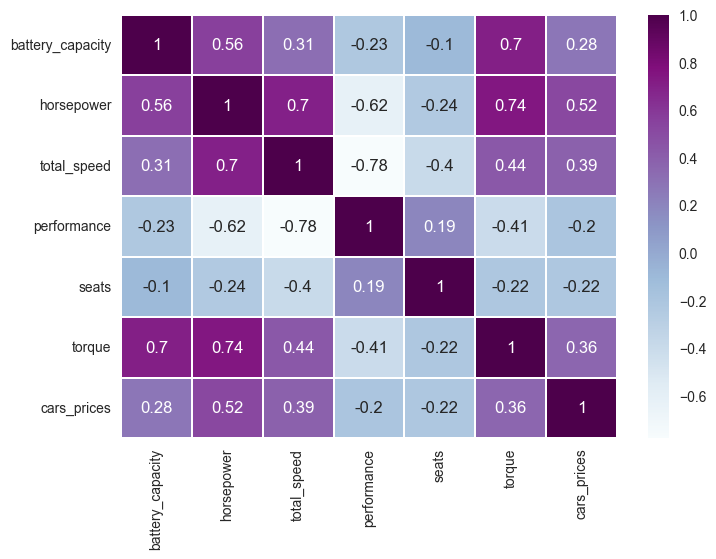

In [668]:
sns.heatmap(pd.concat([cars_df[cars_num+[target]]], axis=1).corr(),linewidths=.1, cmap="BuPu", annot=True)
#target class is 'car_prices'

from the heatmap it apears that horsepower, torque, and total_speed are the strongest numerical predictors for the car price.

To reduce the skewness of the target class we scale using log transform (and at predictions scale back)

In [669]:
cars_df[target]=np.log1p(cars_df[target])

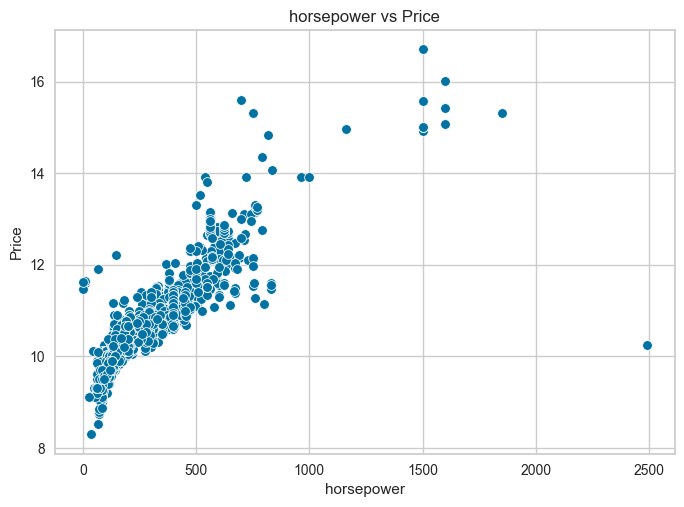

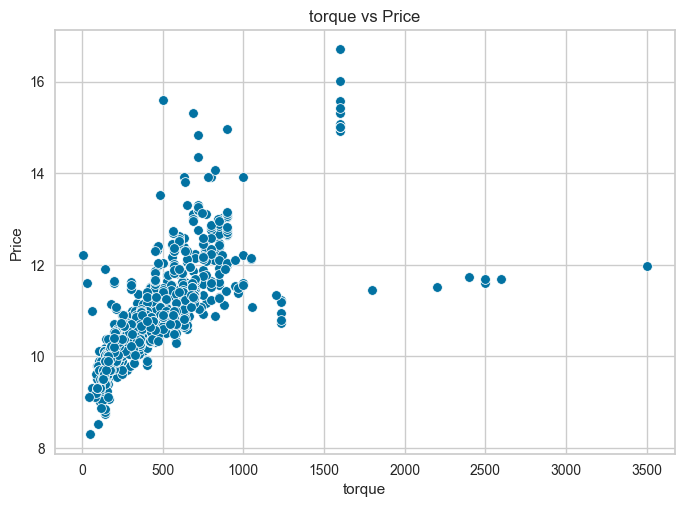

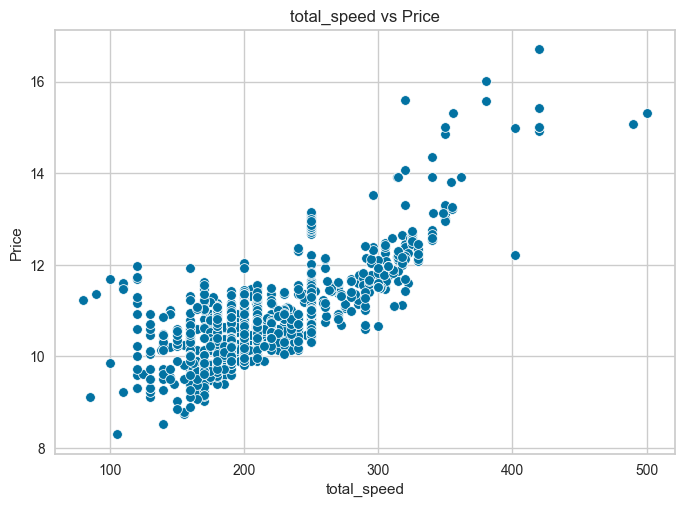

In [670]:
numerical_features = ['horsepower', 'torque', 'total_speed']

for col in numerical_features:
    sns.scatterplot(data=cars_df, x=col, y=target)
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

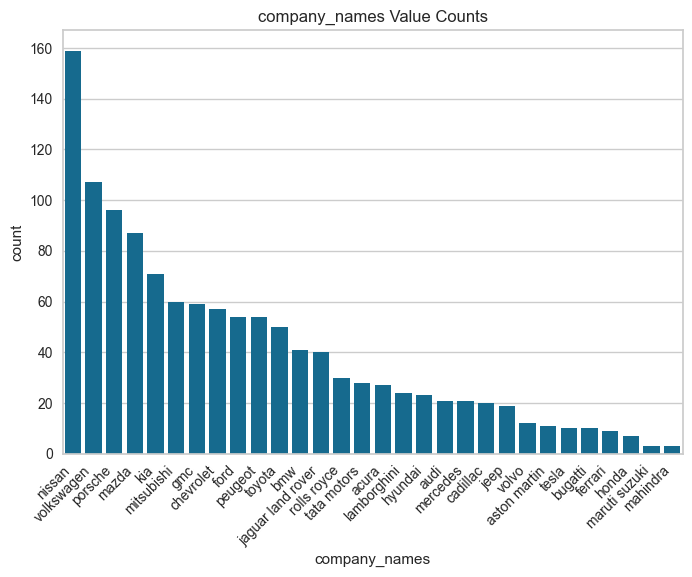

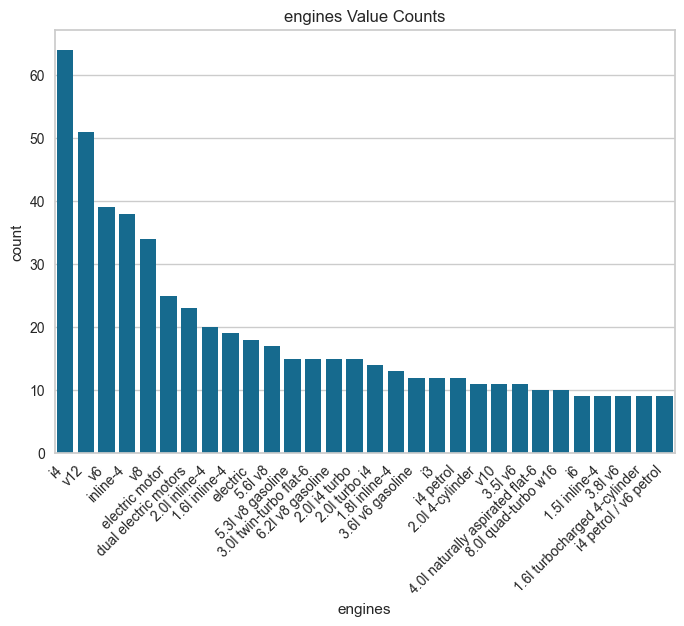

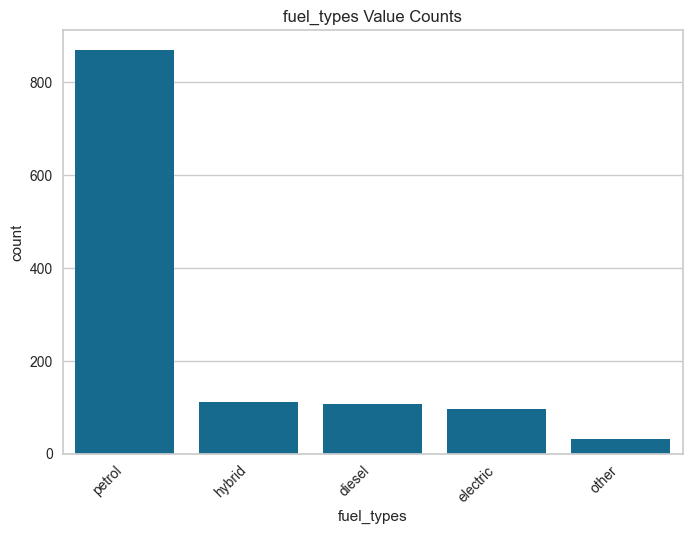

In [671]:
for col in cars_cat:
    top_categories = cars_df[col].value_counts().head(30).index
    sns.countplot(data=cars_df, x=col, order=top_categories)
    plt.xticks(rotation=45, ha='right')
    plt.title(f"{col} Value Counts")
    plt.show()


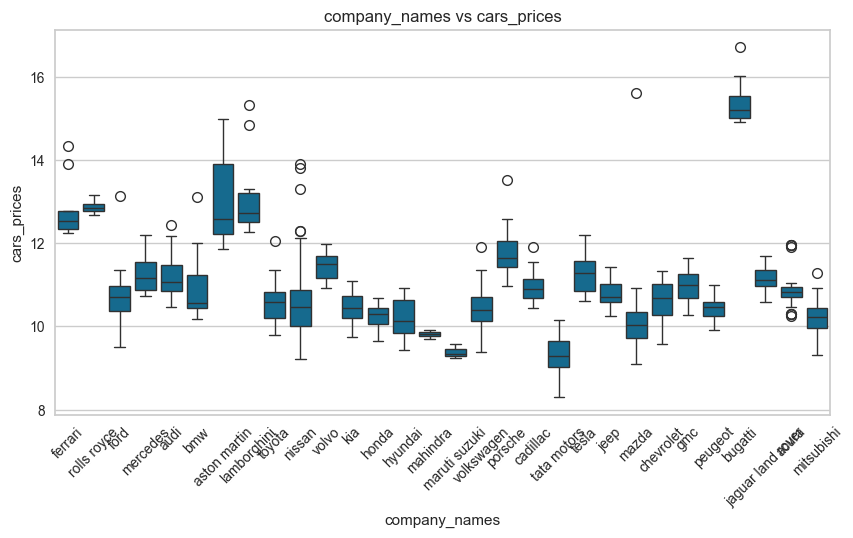

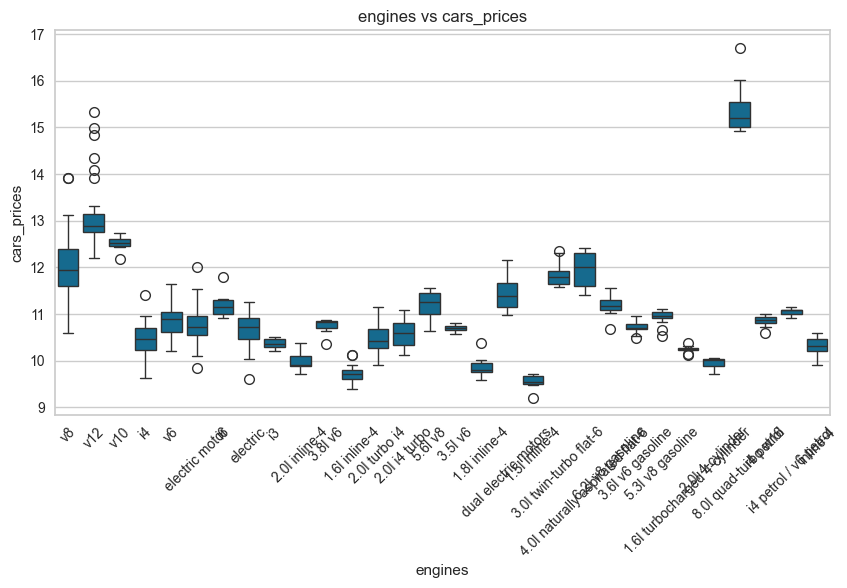

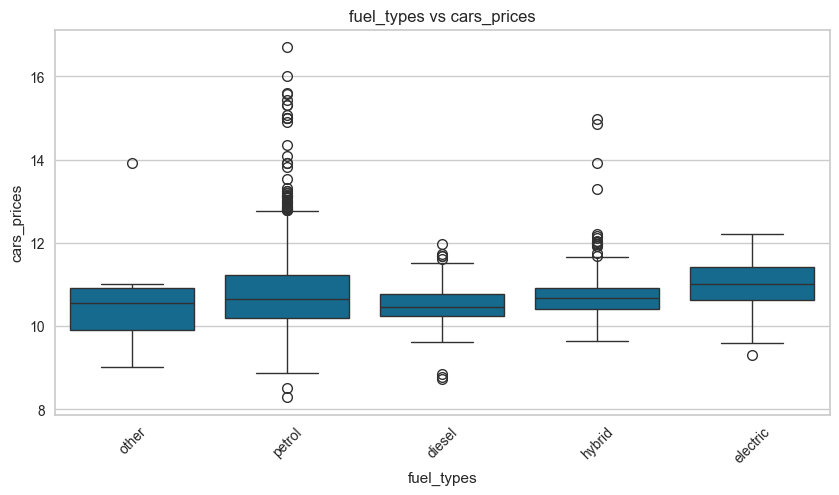

In [672]:
for col in cars_cat:
    top_categories = cars_df[col].value_counts().head(30).index
    plt.figure(figsize=(10,5))
    sns.boxplot(data=cars_df[cars_df[col].isin(top_categories)], x=col, y=target)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs {target}")
    plt.show()

from the company names vs cars prices plot, it is noticeable car brands like Bugati and aston martin have higher prices

## Model Training and Comparison

In [673]:
s = setup(data=cars_df, target='cars_prices', session_id = 123, verbose=False)

best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.2117,0.1253,0.3448,0.8717,0.0284,0.0196,0.1620
rf,Random Forest Regressor,0.2083,0.1312,0.3482,0.8690,0.0287,0.0192,0.3130
et,Extra Trees Regressor,0.2050,0.1334,0.3559,0.8607,0.0294,0.0190,0.2430
lightgbm,Light Gradient Boosting Machine,0.2194,0.1442,0.3682,0.8557,0.0300,0.0201,0.3130
knn,K Neighbors Regressor,0.2378,0.1487,0.3750,0.8508,0.0302,0.0216,0.0810
dt,Decision Tree Regressor,0.2336,0.1561,0.3857,0.8405,0.0318,0.0215,0.0620
br,Bayesian Ridge,0.2456,0.1547,0.3824,0.8396,0.0307,0.0224,0.0560
ridge,Ridge Regression,0.2462,0.1549,0.3827,0.8395,0.0307,0.0224,0.0580
lar,Least Angle Regression,0.2466,0.1551,0.3830,0.8394,0.0307,0.0225,0.0620
lr,Linear Regression,0.2466,0.1551,0.3830,0.8394,0.0307,0.0225,0.0850


In [674]:
best_model

GradientBoostingRegressor(random_state=123)

## Hyperparameter tuning

In [675]:
tuned_model = tune_model(best_model, optimize='r2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2026,0.0854,0.2923,0.9174,0.0247,0.0189
1,0.1810,0.0605,0.2460,0.9219,0.0211,0.0170
2,0.2479,0.1293,0.3596,0.7662,0.0326,0.0243
3,0.2121,0.0949,0.3081,0.9100,0.0249,0.0190
4,0.2484,0.1135,0.3369,0.8860,0.0285,0.0233
5,0.2380,0.2792,0.5284,0.8019,0.0386,0.0206
6,0.2032,0.1051,0.3241,0.8672,0.0272,0.0189
7,0.1943,0.0889,0.2982,0.9203,0.0240,0.0177
8,0.2941,0.2776,0.5269,0.7760,0.0420,0.0266


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [676]:
final_model = finalize_model(tuned_model)

## Model Evaluation

In [677]:
preds = predict_model(final_model)

y_true = np.expm1(preds['cars_prices'])
y_pred = np.expm1(preds['prediction_label'])

print(f"R2: {r2_score(y_true, y_pred)}")
print(f"MAE: { mean_absolute_error(y_true, y_pred)}")
print(f"RMSE: { mean_squared_error(y_true, y_pred, squared=False)}")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.1937,0.0802,0.2831,0.9123,0.0238,0.0179


R2: 0.863608881131595
MAE: 27576.442260095428
RMSE: 115625.03257059066


## Conclusion & Insights


the Gradient Boosting Regressor provides a reliable and well-generalized model for car price prediction. with promising results on the test: 
- R2: 0.863608881131595
- MAE: 27576.442260095428
- RMSE: 115625.03257059066